<a href="https://colab.research.google.com/github/SARU230/Free-energy-surface-heat-map/blob/main/free_energy_from__multiple_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Figure size 800x500 with 0 Axes>

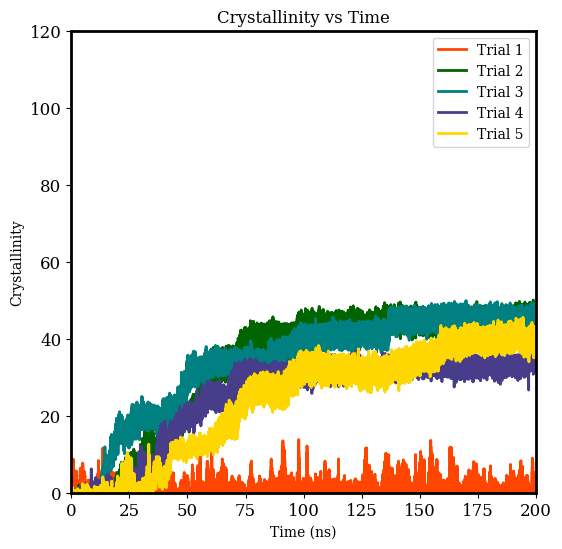

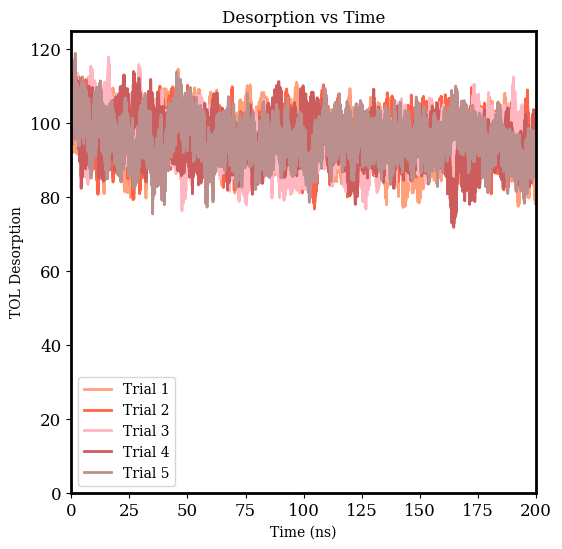

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Font settings
font = {'family' : 'Arial', 'weight' : 'normal', 'size' : 10}
plt.rc('font', **font)

def set_mysetting():
    mpl.rcParams["font.family"] = "serif"
    mpl.rcParams["legend.fontsize"] = "medium"
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)
    plt.rc('lines', lw=2)
set_mysetting()

# File name patterns
S_pattern = "SLC_*"
H_pattern = "TOL_*"

S_files = sorted(glob.glob(S_pattern))[:5]
H_files = sorted(glob.glob(H_pattern))[:5]

S_time_list, S_data_list = [], []
H_time_list, H_data_list = [], []

for fname in S_files:
    df = pd.read_csv(fname, skiprows=1, header=None, delimiter=' ', engine='python')
    S_time_list.append(df.iloc[:, 1] / 1000)  # Time in ns
    S_data_list.append(df.iloc[:, 3])         # Crystallinity

for fname in H_files:
    df = pd.read_csv(fname, skiprows=1, header=None, delimiter=' ', engine='python')
    H_time_list.append(df.iloc[:, 1] / 1000)  # Time in ns
    H_data_list.append(df.iloc[:, 2])         # Adsorption

# Define your five custom colors (hex codes or color names)
custom_colors = ['orangered', 'darkgreen', 'teal', 'darkslateblue', 'gold']  # blue, orange, green, red, purple

# ---- Plot all SLC traces ----
plt.figure(figsize=(8,5))
#for i in range(len(S_time_list)):
#    plt.plot(S_time_list[i], S_data_list[i], alpha=1, color=custom_colors[i], label='SLC' if i==0 else "")
plt.figure(figsize=(6,6))
for i in range(len(S_time_list)):
    plt.plot(
        S_time_list[i], S_data_list[i],
        alpha=1,
        color=custom_colors[i],
        label=f'Trial {i+1}'
    )

plt.xlabel('Time (ns)')
plt.ylabel('Crystallinity')
plt.title('Crystallinity vs Time')
plt.legend()
#plt.show()

# Set axis limits (example: adjust as needed)
plt.xlim(0, 200)        # Set x-axis limits
plt.ylim(0, 120)        # Set y-axis limits

# Thicken plot box/frame
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)  # Increase thickness

plt.legend(frameon=True, fontsize=10, loc='best')
plt.show()

# ---- Plot all solvent traces ----

# Define your five custom colors (hex codes or color names)
#TOL ='lightsalmon', 'tomato', 'lightpink', 'indianred', 'rosybrown'
#DCB ='orchid', 'fuchsia', 'deeppink', 'violet', 'darkviolet'
#HEX
#CHF = 'steelblue', 'lightskyblue', 'cadetblue', 'aqua', 'mediumturquoise'
custom_colors = ['lightsalmon', 'tomato', 'lightpink', 'indianred', 'rosybrown']

plt.figure(figsize=(6,6))
#for i in range(len(H_time_list)):
#    plt.plot(H_time_list[i], H_data_list[i], alpha=1, color=custom_colors[i], label='CHF' if i==0 else "")
for i in range(len(H_time_list)):
    plt.plot(
        H_time_list[i], H_data_list[i],
        alpha=1,
        color=custom_colors[i],
        label=f'Trial {i+1}'
    )
plt.xlabel('Time (ns)')
plt.ylabel('TOL Desorption')
plt.title('Desorption vs Time')
plt.legend()
#plt.show()

# Set axis limits (example: adjust as needed)
plt.xlim(0, 200)
plt.ylim(0, 125)

# Thicken plot box/frame
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)

plt.legend(frameon=True, fontsize=10, loc='best')
plt.show()



In [ ]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import matplotlib as mpl
import sys
import os
import matplotlib as mpl
import re
import glob

pwd=os.getcwd()

import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import argparse
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
import numpy as np
import glob

# File patterns
S_pattern = "SLC_*"
S_files = sorted(glob.glob(S_pattern))[:5]

# Read SLC files (skip header, keep all data)
SLC_arrays = []
for fname in S_files:
    with open(fname) as f:
        lines = f.readlines()
    # Skip header lines starting with '#'
    data = [line.strip().split() for line in lines if line.strip() and not line.startswith("#")]
    arr = np.array(data, dtype=float)
    SLC_arrays.append(arr)
SLC_stack = np.stack(SLC_arrays)  # Shape: (5, nrows, 3)

# Average mol.mean and s columns over all files, keep time from the first file
SLC_time = SLC_stack[0,:,0]
SLC_mol_avg = np.mean(SLC_stack[:,:,1], axis=0)
SLC_s_avg = np.mean(SLC_stack[:,:,2], axis=0)

# Write output: header, three columns, no blank lines, 6 decimals, space-separated
with open("SLC_avg.txt", "w") as f:
    f.write("#! FIELDS time mol.mean s\n\n")
    for t, mol, s in zip(SLC_time, SLC_mol_avg, SLC_s_avg):
        f.write(f"{t:.6f} {mol:.6f} {s:.6f}\n")

# For DCB files (two columns)
H_pattern = "TOL_*"
H_files = sorted(glob.glob(H_pattern))[:5]
DCB_arrays = []
for fname in H_files:
    with open(fname) as f:
        lines = f.readlines()
    data = [line.strip().split() for line in lines if line.strip() and not line.startswith("#")]
    arr = np.array(data, dtype=float)
    DCB_arrays.append(arr)
DCB_stack = np.stack(DCB_arrays)  # Shape: (5, nrows, 2)
DCB_time = DCB_stack[0,:,0]
DCB_avg = np.mean(DCB_stack[:,:,1], axis=0)

with open("DCB_avg.txt", "w") as f:
    f.write("#! FIELDS time den_around\n\n")
    for t, d in zip(DCB_time, DCB_avg):
        f.write(f"{t:.6f} {d:.6f}\n")


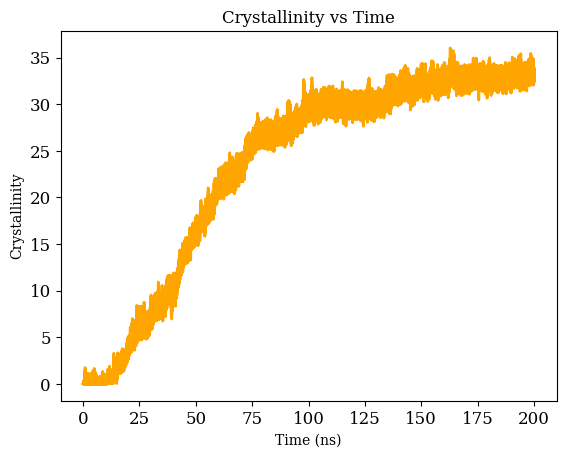

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

# Font settings
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 10}
plt.rc('font', **font)

def set_mysetting():
    mpl.rcParams["font.family"] = "serif"
    mpl.rcParams["legend.fontsize"] = "medium"
    plt.rc('xtick', labelsize=12)     # tick labels bigger
    plt.rc('ytick', labelsize=12)     # tick labels bigger
    plt.rc('lines', lw=2)             # thicker black lines
    # plt.rc('savefig', dpi=800)      # higher res output

set_mysetting()

# File names
S_name = "SLC_avg.txt"
H_name = "DCB_avg.txt"

# Read data
SS = pd.read_csv(S_name, skiprows=2, header=None, delimiter=' ', engine='python')
HH = pd.read_csv(H_name, skiprows=2, header=None, delimiter=' ', engine='python')

# Extract columns for plotting
time_S = SS.iloc[:, 0] / 1000  # Convert first column from ps to ns
S = SS.iloc[:, 2]              # Fourth column

time_H = HH.iloc[:,0] / 1000  # Convert first column from ps to ns
H = HH.iloc[:, 1]              # Third column

# Plotting
plt.plot(time_S, S, color='orange', label='SLC')  # Plot S with time in ns


# Add labels, title, and legend
plt.xlabel('Time (ns)')  # Updated to ns
plt.ylabel('Crystallinity')
plt.title('Crystallinity vs Time')
#plt.legend()

# Show plot
plt.show()

Text(0.5, 1.0, 'Adsorption vs Time')

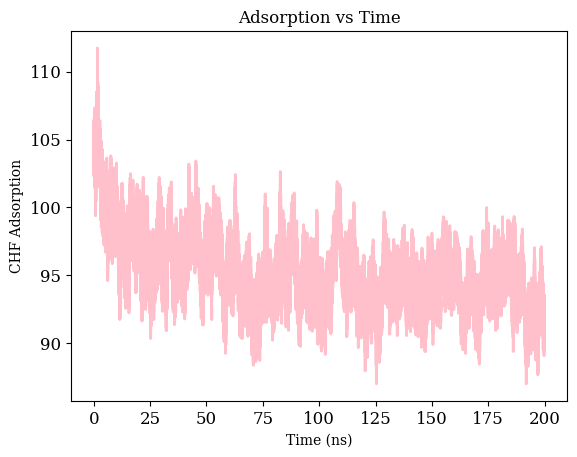

In [ ]:
plt.plot(time_H, H, color='pink', label='CHF')  # Uncomment to plot H

plt.xlabel('Time (ns)')
plt.ylabel('CHF Adsorption')
plt.title('Adsorption vs Time')
#plt.legend()

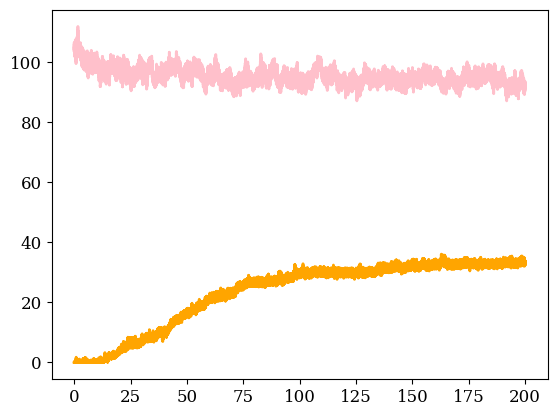

In [ ]:
plt.plot(time_S, S, color='orange', label='SLC')  # Plot S with time in ns
plt.plot(time_H, H, color='pink', label='TOL')

In [ ]:
def get_hist(): #THIS IS THE MAIN FUNCTION FOR FES - USE AS NEEDED
    #load data
    v1 = np.array(pd.DataFrame(S).stack()) #DES
    v2 = np.array(pd.DataFrame(H).stack()) #HEX
    ######## Reading in Data and determining span ###############
    i1 = 100 #bins
    i2 = 100 #bins
    V = np.zeros((i1,i2))
    V1 = np.zeros((i1))
    V2 = np.zeros((i2))
    DG = np.zeros((i1,i2))
    kB = 3.2976268E-24 #cal/K
    An = 6.02214179E23
    T = 298
    minv1 = min(v1)
    maxv1 = max(v2)
    minv2 = min(v1)
    maxv2 = max(v2)
    ################### Data span ####################
    I1 = maxv1 - minv1
    I2 = maxv2 - minv2

    for i in range(len(v1)):
        for x in range(i1):
            if v1[i] <= minv1+(x+1)*I1/i1 and v1[i] > minv1+x*I1/i1:
                V1[x] = V1[x] + 1
                break
    DG_s = -0.001*An*kB*T*(np.log(V1))
    DG_s = DG_s - DG_s[0]

    for i in range(len(v2)):
        for x in range(i1):
            if v2[i] <= minv2+(x+1)*I2/i2 and v2[i] > minv2+x*I2/i2:
                V2[x] = V2[x] + 1
                break
    DG_h = -0.001*An*kB*T*np.log(V2)
    DG_h = DG_h - DG_h.min()


    ##### Binning for FES
    for i in range(len(v1)):
     for x in range(i1):
         if v1[i] <= minv1+(x+1)*I1/i1 and v1[i] > minv1+x*I1/i1:
             for y in range(i2):
                 if v2[i] <= minv2+(y+1)*I2/i2 and v2[i] > minv2+y*I2/i2:
                     V[x][y] = V[x][y] +1
                     break
             break
    ##### Finding the maximum ##############
    P = list()
    for x in range(i1):
        for y in range(i2):
            P.append(V[x][y])
    Pmax = max(P)
    LnPmax = math.log(Pmax)
    #### Calculating Delta G values ##############

    #LnPstd = math.log(Pstd)
    for x in range(i1):
        for y in range(i2):
            if V[x][y] == 0:
                DG[x][y] = 20
                continue
            else:
                DG[x][y] = -0.001*An*kB*T*((math.log(V[x][y])-LnPmax)) #kcal/mol
    xi, yi = np.mgrid[minv1:maxv1:(i1)*1j, minv2:maxv2:(i2)*1j]
    return(DG, xi, yi, minv1, maxv1, minv2, maxv2, V, DG_s, DG_h)

Z11, X11, Y11, min1v11, max1v11, min1v21, max1v21, V11, s11, h11 = get_hist() #this calls the main function

<ipython-input-57-2d557952e692>:28: RuntimeWarning: divide by zero encountered in log
  DG_s = -0.001*An*kB*T*(np.log(V1))
<ipython-input-57-2d557952e692>:36: RuntimeWarning: divide by zero encountered in log
  DG_h = -0.001*An*kB*T*np.log(V2)


Text(0, 0.5, 'Free energy [kcal/mol]')

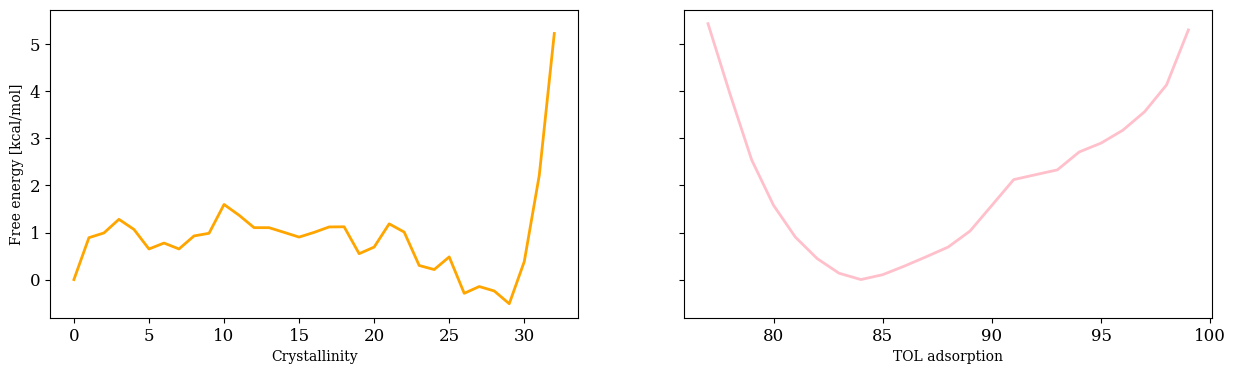

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,4), sharey=True)

ax[0].plot(s11, color='orange')
ax[1].plot(h11, color='pink')
ax[0].set_xlabel('Crystallinity')
ax[1].set_xlabel('TOL adsorption')
ax[0].set_ylabel('Free energy [kcal/mol]')
#ax[0].set_xlim(0 , 150)

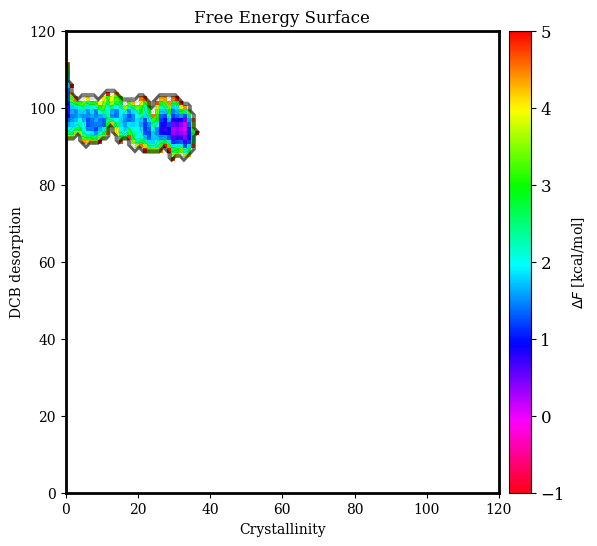

In [ ]:
Cmap2 = plt.get_cmap('hsv')
Cmap2 = Cmap2.reversed()
Cmap2.set_over('white')

fig, ax = plt.subplots(1, 1, figsize=(6,6))


#fig = plt.plot(figsize=(21, 5))

# Details for the BAR
vmin = -1
vmax = 5

#CHECK THESE

im1 = ax.imshow(Z11.T-Z11[:,:].min(), cmap=Cmap2, extent=[min1v11,max1v11,min1v21,max1v21], origin='lower', aspect='auto', vmin=vmin, vmax=vmax)
ax.contour(X11, Y11, Z11, 28, colors=['black'], linewidths=0.1)
divider = make_axes_locatable(plt.gca())


#google matplotlib colormaps for color schemes other than "plasma"
ax.set_title("Free Energy Surface")
ax.set_xlabel('Crystallinity')
ax.set_ylabel('DCB desorption')
ax.set_ylim(0, 120)
ax.set_xlim(0,120)
ax.tick_params(axis='both', which='major', labelsize=10)
cax = divider.append_axes("right", size="5%", pad=0.1)


#Cmap = 'Spectral'
cbar = plt.colorbar(im1, cax=cax)
cbar.set_ticks([-1, 0, 1, 2, 3, 4, 5])
cbar.ax.tick_params(labelsize=12)

z_l = r'$\Delta F$'+' [kcal/mol]' #using latex in matplotlib
cbar.set_label(z_l,size=10)

# Thicken plot box/frame if desired
for spine in ax.spines.values():
    spine.set_linewidth(2)